In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 17.4 MB/s eta 0:00:0000:01


In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mT57enooROcGwCX22ayO")
project = rf.workspace("nikhil-chapre-xgndf").project("detect-players-dgxz0")
version = project.version(7)
dataset = version.download("yolov11")   

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detect-Players--7 in yolov11:: 100%|██████████| 2936/2936 [00:00<00:00, 3012.01it/s]


In [11]:
data_yaml_content = """
train: /kaggle/working/Detect-Players--7/train/images
val: /kaggle/working/Detect-Players--7/valid/images
test: /kaggle/working/Detect-Players--7/test/images

nc: 2
names: ['Ball', 'Player']
"""

with open("/kaggle/working/sports_data.yaml", "w") as f:
    f.write(data_yaml_content)

In [6]:
!cp /kaggle/input/sportsdet/pytorch/default/2/player_detector_football.pt .

In [7]:
from ultralytics import YOLO
model = YOLO("player_detector_football.pt")

In [12]:
model.export(data="sports_data.yaml",format="onnx", dynamic=True, int8=True)  # You can also use `torchscript` or `engine` (for TensorRT)

Ultralytics 8.3.50 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'player_detector_football.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.44...
ONNX: export success ✅ 21.9s, saved as 'player_detector_football.onnx' (10.0 MB)

Export complete (22.6s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=player_detector_football.onnx imgsz=640 int8 
Validate:        yolo val task=detect model=player_detector_football.onnx imgsz=640 data=/kaggle/working/sports_data.yaml int8 
Visualize:       https://netron.app


'player_detector_football.onnx'

In [ ]:
onnx_model = YOLO("/kaggle/working/player_detector_football.onnx")

In [ ]:
results = onnx_model("/kaggle/working/Detect-Players--7/test/images/08fd33_0_mp4-67_jpg.rf.b225a3de66c9a3489ebfc718e0a5942b.jpg")

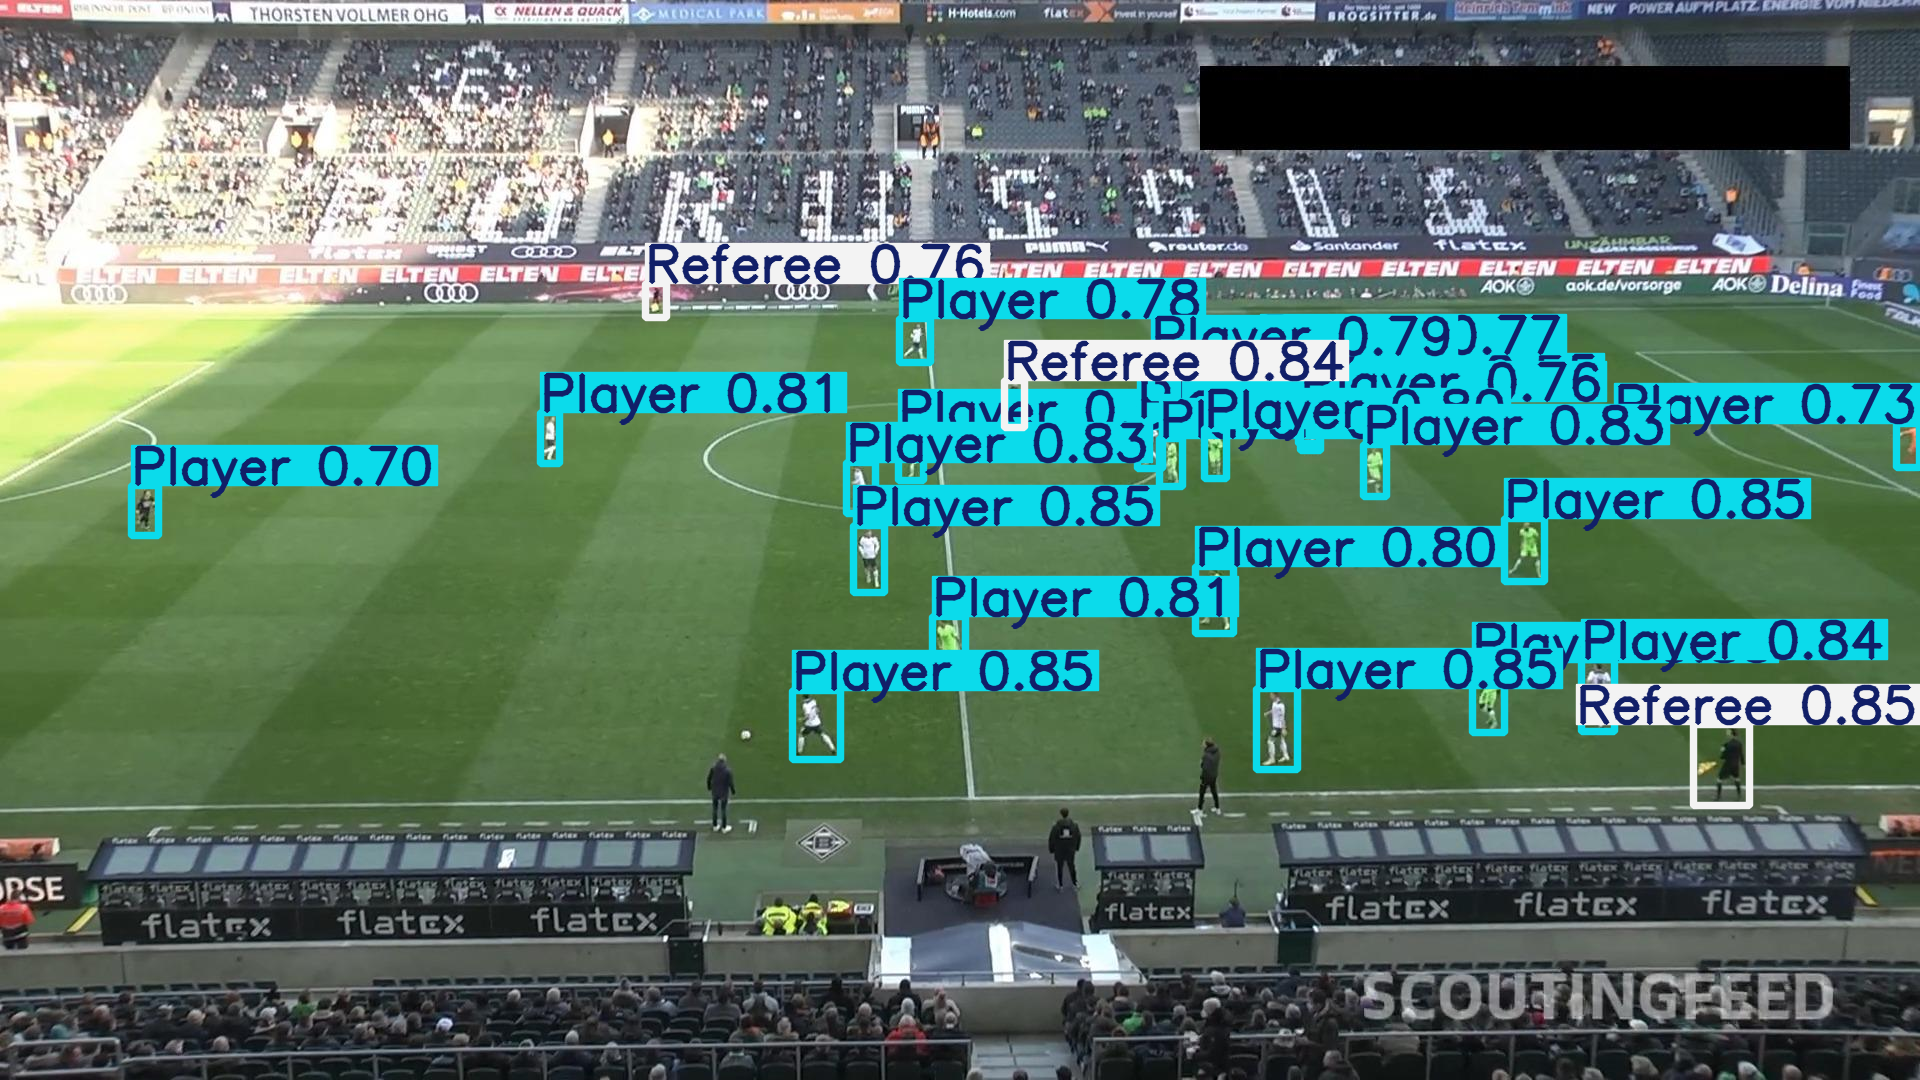

In [14]:
for result in results:
    result.show()

In [17]:
onnx_model.val(data="sports_data.yaml",split="test")

Ultralytics 8.3.50 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
Loading /kaggle/working/player_detector_football.onnx for ONNX Runtime inference...
Preferring ONNX Runtime AzureExecutionProvider
Setting batch=1 input of shape (1, 3, 640, 640)


100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]
val: Scanning /kaggle/working/Detect-Players--7/test/labels... 146 images, 1 backgrounds, 0 corrupt: 100%|██████████| 146/146 [00:00<00:00, 715.69it/s]

val: New cache created: /kaggle/working/Detect-Players--7/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 146/146 [00:18<00:00,  7.85it/s]


                   all        146       2245      0.915      0.791      0.839      0.542
                  Ball        113        113      0.926      0.513      0.623      0.333
                Player        144       1955      0.945      0.966      0.969      0.675
               Referee        112        177      0.874      0.893      0.926       0.62
Speed: 3.0ms preprocess, 96.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fddfa6803d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [23]:
model.export(data="/kaggle/working/sports_data.yaml",format="torchscript",optimize=True,int8=True)

Ultralytics 8.3.50 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'player_detector_football.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)

TorchScript: starting export with torch 2.4.0+cpu...
TorchScript: optimizing for mobile...
TorchScript: export success ✅ 3.6s, saved as 'player_detector_football.torchscript' (10.0 MB)

Export complete (4.2s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=player_detector_football.torchscript imgsz=640 int8 
Validate:        yolo val task=detect model=player_detector_football.torchscript imgsz=640 data=/kaggle/working/sports_data.yaml int8 
Visualize:       https://netron.app


'player_detector_football.torchscript'

In [24]:
torch_model = YOLO('player_detector_football.torchscript')

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [25]:
torch_model.val(data="sports_data.yaml",split="test")

Ultralytics 8.3.50 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
Loading player_detector_football.torchscript for TorchScript inference...


val: Scanning /kaggle/working/Detect-Players--7/test/labels.cache... 146 images, 1 backgrounds, 0 corrupt: 100%|██████████| 146/146 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.69s/it]


                   all        146       2245      0.915      0.791      0.839      0.542
                  Ball        113        113      0.926      0.513      0.623      0.333
                Player        144       1955      0.945      0.966      0.969      0.675
               Referee        112        177      0.874      0.893      0.926       0.62
Speed: 5.3ms preprocess, 293.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fde010cc7f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04